In [1]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv("Results/2018_stable_refills_updated.csv", index_col=0, header=[0,1])
df.head()

bias disc         gas         oven1        solinj       \
                    median std% median   std% median  std%  median std%   
optigrid_cluster                                                          
93                  -231.0  0.2   9.87  0.006    7.5  3.12  1255.0  0.0   
136                 -248.0  0.1   9.88  0.006    5.2  1.92  1240.0  0.1   
173                 -276.0  0.4   9.92  0.005    5.9  4.25  1230.0  0.1   
68                  -239.0  0.2   9.90  0.005    7.6  2.34  1265.0  0.0   
176                 -238.0  2.7   9.91  0.018   18.5  4.88  1190.0  0.1   

                 solcen       ...  BCT25             RF         DENSITY  \
                 median std%  ... median   std%  median std% percentage   
optigrid_cluster              ...                                         
93                240.0  0.0  ...  0.026  9.811  1571.0  0.3        2.5   
136               220.0  0.0  ...  0.032  5.801  1935.0  0.7        2.5   
173               230.0  0.0  ...  0.030  8.425  1887.0  0.7        2.3   
68                230.0  0.0  ...  0.029  5.287  1590.0  2.1        2.2   
176               290.0  0.0  ...  0.035  6.415  1010.0  0.3        2.1   

                 DURATION                             REFILL                 
                 in_hours longest_in_hours num_splits  index delta_in_hours  
optigrid_cluster                                                             
93                   89.8             89.8       12.0   11.0          150.5  
136                  88.8             70.6        3.0   16.0           45.4  
173                  81.7             72.6        6.0   17.0           21.2  
68                   78.0             76.3       29.0   10.0           20.1  
176                  73.9             73.9        4.0   18.0          267.7  

[5 rows x 24 columns]

In [20]:
import sklearn

def train(k, X, weights):
    model = sklearn.cluster.KMeans(n_clusters=k).fit(X, sample_weight=weights)
    return model

In [21]:
features = [
    'bias disc',
    'gas',
    'solinj',
    'solcen',
    'solext',
    'HTI',
    'RF'
]

X = df.xs('median', level=1, axis=1)[features].values
weights = df[('DURATION', 'in_hours')].values
X.shape

(180, 7)

In [37]:
ks = range(2, 30)
scores_silhouette = np.full(len(ks), np.inf)
scores_dbi = np.full(len(ks), np.inf)
scores_ch = np.full(len(ks), np.inf)

for i, k in enumerate(ks):
    model = train(k, X, weights)
    scores_silhouette[i] = sklearn.metrics.silhouette_score(X, model.labels_)
    scores_dbi[i] = sklearn.metrics.davies_bouldin_score(X, model.labels_)
    scores_ch[i] = sklearn.metrics.calinski_harabasz_score(X, model.labels_)

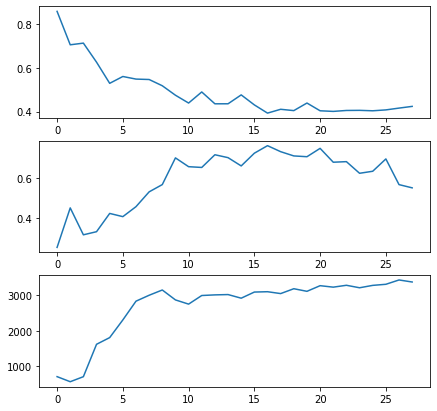

In [38]:
import matplotlib.pyplot as plt

_, axs = plt.subplots(3, 1, figsize=(7, 7))
axs[0].plot(scores_silhouette)
axs[1].plot(scores_dbi)
axs[2].plot(scores_ch)

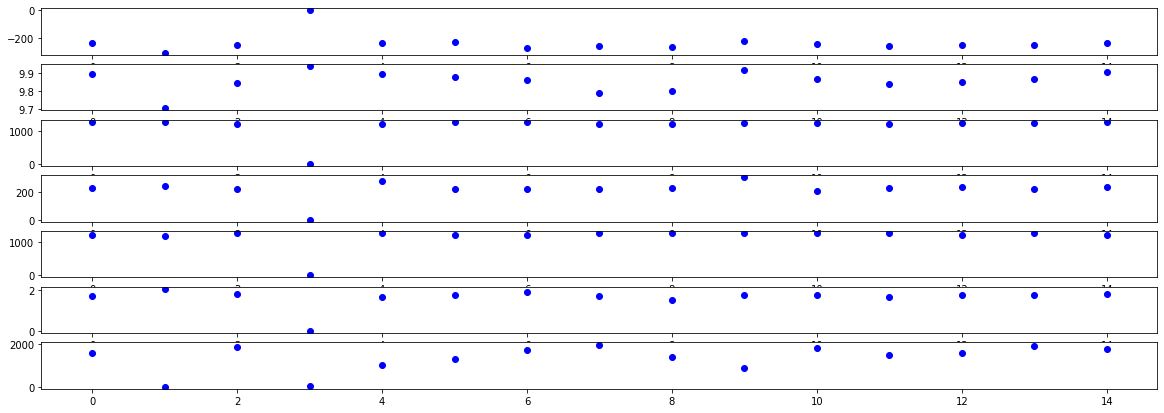

In [51]:
model = train(15, X, weights)
import matplotlib.pyplot as plt

fix, axs = plt.subplots(model.cluster_centers_.shape[1], 1, figsize=(20, 7))
for i in range(model.cluster_centers_.shape[1]):
    axs[i].plot(model.cluster_centers_[:, i], 'bo ')